<a href="https://colab.research.google.com/github/Liping-LZ/BDAI_2425/blob/main/Supervised%20learning/Regression/DecisionTreeRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Load the data

Here we use a sample dataset from Scikit Learn

---



In [ ]:
from sklearn.datasets import load_diabetes
# import the data
data = load_diabetes()

In [ ]:
# show the dataset
print(data)

# print a return space
print('\n')

# show the keys
print(data.keys())

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

In [ ]:
# load the data (target and features) into DataFrame
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


# Step 2: Data checking & data cleaning

---

In [ ]:
# Understanding the data - summary statistics
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [ ]:
# Understanding the data - data types
print(df.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [ ]:
# Check for missing values and remove them (if any)
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


<Axes: >

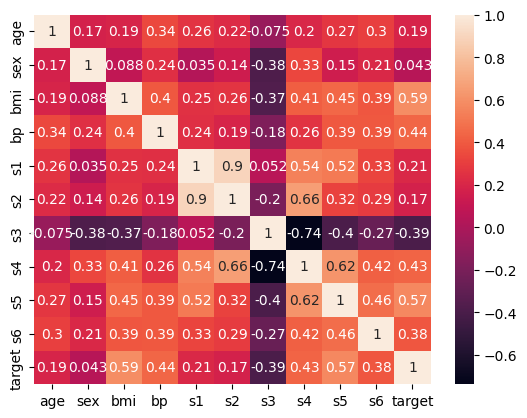

In [ ]:
import seaborn as sns

correlation_matrix = df.corr()
# print a correlation heat map
sns.heatmap(data=correlation_matrix, annot=True)

# Step 3: Feature engineering
For this case, we skip this step because our data is pretty clean and simple.

---

# Step 4: Separate the target (Y) and features (X)

---

In [ ]:
X = df.drop('target', axis=1)
y = df['target']

# Step 5: Split data into training and test

---

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [ ]:
# Check the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


# Step 6: Select the algorithms
In this case, we are using decision tree for regression. Check the documentation:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor


---

# Step 7: Create and train the model

---

In [ ]:
from sklearn.tree import DecisionTreeRegressor as DTR

# Initialize the Decision Tree regressor()
reg = DTR() # here we just call the model from scikit learn with default hyperparameter

# Train the regressor
reg = reg.fit(X_train,y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Step 8: Check the model performance

---

In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error

# Evaluate the model using r2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("RMSE:", rmse)

R2 Score: 0.08511025180464682
RMSE: 69.6220131790307


# Step 9: Hyperparamter optimisation
We need to improve our model performance by finding the best hyperameters.

The following hyperparameters will be optimised:


*   Criterion - the function to measure split quality;
*   Max Depth - the number of child nodes to build in the tree;
*   Min sample split - the minimum number of samples needed to perform a split;
*   min_samples_leaf: Minimum samples in leaf nodes.
*   max_features: The number of features to consider when looking for the best split



---

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse'],
    'max_features': ['sqrt', 'log2', None]
}

# Create grid search object
grid_search = GridSearchCV(
    DTR(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2', # If rmse, then use 'neg_mean_squared_error'
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Print results
print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'criterion': 'squared_error', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.28592428075048615


# Step 10: Retrain the model and check the performance again

---

In [ ]:
reg = DTR(criterion= 'squared_error', max_depth= 3, max_features = None, min_samples_leaf= 4, min_samples_split= 2)

# Train the regressor
reg = reg.fit(X_train,y_train)

# Make predictions
y_pred = reg.predict(X_test)

# Evaluate the model - check the score metric again
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("RMSE:", rmse)

R2 Score: 0.36004414120283446
RMSE: 58.228715014669916


In [ ]:
# We can print out our predictions
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction

,Actual,Predicted
287,219.0,158.830189
211,70.0,175.800000
72,202.0,158.830189
321,230.0,230.515152
73,111.0,109.922330
...,...,...
255,153.0,109.922330
90,98.0,80.877551
57,37.0,80.877551
391,63.0,80.877551


Decision tree is a good option if your data is non-linear. But if the data is linear, then you can try linear regression. Check this notebook for multiple linear regression: https://github.com/Liping-LZ/BDAI_2425/blob/main/Regression/WM9G1_BDAI_Regression.ipynb

# Now is your turn

The data you are using is `ENB2012_data.xlsx`. Please download from Moodle. In this task, you are buidling decision tree model to predict maintenance. Please click into [this notebook](https://colab.research.google.com/drive/10613SmWtZd2ovACTkgWhbs7keZ-8cJUP?usp=sharing) to start the challenge.